In [57]:
import numpy as np
import pandas as pd

In [58]:
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [59]:
ds =  pd.read_csv(r'C:\Users\sarka\Desktop\Major Project\input\nyse\prices-split-adjusted.csv' , header=0)
#Adjusted prices used for absolute consumer value
ds.head(5)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [60]:
ms = ds[ds['symbol']=='MSFT']
ms_stock_prices = ms.close.values.astype('float32')

In [61]:
ms_stock_prices

array([30.95, 30.96, 30.77, ..., 62.99, 62.9 , 62.14], dtype=float32)

In [62]:
ms_stock_prices.reshape(1762, 1)

array([[30.95],
       [30.96],
       [30.77],
       ...,
       [62.99],
       [62.9 ],
       [62.14]], dtype=float32)

In [63]:
ms_stock_prices.shape

(1762,)

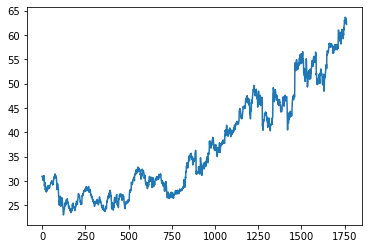

In [64]:
plt.plot(ms_stock_prices)
plt.show()

In [65]:
sc = MinMaxScaler(feature_range=(0,1))
ms_dataset = sc.fit_transform(ms_stock_prices.reshape(-1,1))

In [66]:
ms_dataset.shape

(1762, 1)

In [67]:
train_size = int(0.80 * len(ms_dataset))
test_size = len(ms_dataset)-train_size

In [68]:
train , test = ms_dataset[0:train_size,:], ms_dataset[train_size:len(ms_dataset),:]
print(len(train))
print(len(test))

1409
353


In [69]:
#lookback is Number of steps to check for output
def create_dataset(dataset, look_back=30):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [70]:
#looks at n values to determine next
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [71]:
trainX.shape

(1406, 2)

In [72]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

In [73]:
trainX.shape
trainX

array([[[0.19551837],
        [0.19576454]],

       [[0.19576454],
        [0.19108593]],

       [[0.19108593],
        [0.18320614]],

       ...,

       [[0.5833538 ],
        [0.5860626 ]],

       [[0.5860626 ],
        [0.6040384 ]],

       [[0.6040384 ],
        [0.60502344]]], dtype=float32)

In [74]:
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [75]:
print(testX.shape)
print(testY.reshape(-1,1))

(350, 2, 1)
[[0.58433884]
 [0.58409256]
 [0.5907412 ]
 [0.59862095]
 [0.59738976]
 [0.5811376 ]
 [0.5577443 ]
 [0.493967  ]
 [0.45973903]
 [0.42994338]
 [0.48510212]
 [0.5144053 ]
 [0.51514405]
 [0.505048  ]
 [0.46318644]
 [0.5011081 ]
 [0.5045555 ]
 [0.48263973]
 [0.514159  ]
 [0.493967  ]
 [0.49938434]
 [0.50406307]
 [0.49322826]
 [0.51637524]
 [0.5242551 ]
 [0.5230239 ]
 [0.50406307]
 [0.5195765 ]
 [0.5144053 ]
 [0.51366657]
 [0.5146516 ]
 [0.5153902 ]
 [0.49938434]
 [0.50307804]
 [0.5232701 ]
 [0.53188866]
 [0.5555282 ]
 [0.5816302 ]
 [0.584585  ]
 [0.5858162 ]
 [0.6018222 ]
 [0.5934499 ]
 [0.5907412 ]
 [0.5880324 ]
 [0.58286136]
 [0.5909874 ]
 [0.6032997 ]
 [0.60600835]
 [0.60970205]
 [0.5956661 ]
 [0.6161043 ]
 [0.7352868 ]
 [0.7692686 ]
 [0.7554789 ]
 [0.76262003]
 [0.7473529 ]
 [0.72962326]
 [0.74439794]
 [0.7668062 ]
 [0.7729624 ]
 [0.7724698 ]
 [0.785767  ]
 [0.7670525 ]
 [0.7510465 ]
 [0.754494  ]
 [0.7463679 ]
 [0.73454815]
 [0.75744885]
 [0.7377493 ]
 [0.7594188 ]
 [0.7616

In [76]:
recc_model = Sequential()

In [77]:
#RNN Model
recc_model.add(LSTM(input_shape=(trainX.shape[1],1), units=100, return_sequences=True, kernel_initializer='random_uniform'))
recc_model.add(Activation('relu'))
#recc_model.add(Activation('linear'))
recc_model.add(Dropout(0.2))
#recc_model.add(Dropout(0.5))
#hidden_1
recc_model.add(LSTM(units=50,return_sequences=True))
recc_model.add(Activation('relu'))
recc_model.add(Dropout(0.1))
#recc_model.add(Dense(units=50, activation = 'relu'))
#recc_model.add(Dropout(0.6))

#hidden_2
#recc_model.add(Dense(units=50, activation = 'relu'))
#recc_model.add(LSTM(units=50,return_sequences=True))
#recc_model.add(Dropout(0.2))
#Fourth Hidden with no return sequences
recc_model.add(LSTM(units=50))
recc_model.add(Dropout(0.1))
recc_model.add(Dense(units=20, activation = 'linear'))
#output Layer
recc_model.add(Dense(units=1))
recc_model.add(Activation('linear'))

In [78]:
recc_model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

In [79]:
history = recc_model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=300,
    validation_split=0.15)

Train on 1195 samples, validate on 211 samples
Epoch 1/300
1195/1195 [==============================] - 3s 3ms/step - loss: 0.0399 - mean_absolute_error: 0.1477 - val_loss: 0.1784 - val_mean_absolute_error: 0.4183
Epoch 2/300
1195/1195 [==============================] - 0s 118us/step - loss: 0.0191 - mean_absolute_error: 0.1098 - val_loss: 0.0899 - val_mean_absolute_error: 0.2943
Epoch 3/300
1195/1195 [==============================] - 0s 96us/step - loss: 0.0195 - mean_absolute_error: 0.1190 - val_loss: 0.1257 - val_mean_absolute_error: 0.3499
Epoch 4/300
1195/1195 [==============================] - 0s 96us/step - loss: 0.0178 - mean_absolute_error: 0.1030 - val_loss: 0.1287 - val_mean_absolute_error: 0.3544
Epoch 5/300
1195/1195 [==============================] - 0s 97us/step - loss: 0.0162 - mean_absolute_error: 0.1011 - val_loss: 0.0919 - val_mean_absolute_error: 0.2985
Epoch 6/300
1195/1195 [==============================] - 0s 95us/step - loss: 0.0124 - mean_absolute_error: 0.090

1195/1195 [==============================] - 0s 114us/step - loss: 4.5254e-04 - mean_absolute_error: 0.0157 - val_loss: 6.3017e-04 - val_mean_absolute_error: 0.0177
Epoch 48/300
1195/1195 [==============================] - 0s 107us/step - loss: 4.1267e-04 - mean_absolute_error: 0.0147 - val_loss: 5.3021e-04 - val_mean_absolute_error: 0.0158
Epoch 49/300
1195/1195 [==============================] - 0s 98us/step - loss: 4.0174e-04 - mean_absolute_error: 0.0152 - val_loss: 6.0501e-04 - val_mean_absolute_error: 0.0172
Epoch 50/300
1195/1195 [==============================] - 0s 109us/step - loss: 3.9195e-04 - mean_absolute_error: 0.0144 - val_loss: 5.9237e-04 - val_mean_absolute_error: 0.0169
Epoch 51/300
1195/1195 [==============================] - 0s 113us/step - loss: 4.6945e-04 - mean_absolute_error: 0.0156 - val_loss: 8.8130e-04 - val_mean_absolute_error: 0.0231
Epoch 52/300
1195/1195 [==============================] - 0s 93us/step - loss: 4.4964e-04 - mean_absolute_error: 0.0158 - va

1195/1195 [==============================] - 0s 98us/step - loss: 3.8392e-04 - mean_absolute_error: 0.0146 - val_loss: 5.1038e-04 - val_mean_absolute_error: 0.0155
Epoch 94/300
1195/1195 [==============================] - 0s 98us/step - loss: 3.7611e-04 - mean_absolute_error: 0.0144 - val_loss: 6.5361e-04 - val_mean_absolute_error: 0.0183
Epoch 95/300
1195/1195 [==============================] - 0s 99us/step - loss: 3.3595e-04 - mean_absolute_error: 0.0137 - val_loss: 6.1952e-04 - val_mean_absolute_error: 0.0175
Epoch 96/300
1195/1195 [==============================] - 0s 99us/step - loss: 3.5523e-04 - mean_absolute_error: 0.0139 - val_loss: 6.6370e-04 - val_mean_absolute_error: 0.0185
Epoch 97/300
1195/1195 [==============================] - 0s 97us/step - loss: 3.4973e-04 - mean_absolute_error: 0.0140 - val_loss: 5.2030e-04 - val_mean_absolute_error: 0.0156
Epoch 98/300
1195/1195 [==============================] - 0s 99us/step - loss: 3.8439e-04 - mean_absolute_error: 0.0143 - val_lo

Epoch 139/300
1195/1195 [==============================] - 0s 114us/step - loss: 3.3118e-04 - mean_absolute_error: 0.0136 - val_loss: 5.0160e-04 - val_mean_absolute_error: 0.0153
Epoch 140/300
1195/1195 [==============================] - 0s 106us/step - loss: 3.3377e-04 - mean_absolute_error: 0.0134 - val_loss: 6.5937e-04 - val_mean_absolute_error: 0.0185
Epoch 141/300
1195/1195 [==============================] - 0s 107us/step - loss: 3.2832e-04 - mean_absolute_error: 0.0134 - val_loss: 5.0732e-04 - val_mean_absolute_error: 0.0155
Epoch 142/300
1195/1195 [==============================] - 0s 109us/step - loss: 3.7230e-04 - mean_absolute_error: 0.0143 - val_loss: 5.2566e-04 - val_mean_absolute_error: 0.0159
Epoch 143/300
1195/1195 [==============================] - 0s 113us/step - loss: 3.2981e-04 - mean_absolute_error: 0.0135 - val_loss: 5.7295e-04 - val_mean_absolute_error: 0.0170
Epoch 144/300
1195/1195 [==============================] - 0s 114us/step - loss: 3.4407e-04 - mean_absolu

Epoch 185/300
1195/1195 [==============================] - 0s 119us/step - loss: 2.8385e-04 - mean_absolute_error: 0.0127 - val_loss: 4.5648e-04 - val_mean_absolute_error: 0.0145
Epoch 186/300
1195/1195 [==============================] - 0s 112us/step - loss: 3.0466e-04 - mean_absolute_error: 0.0130 - val_loss: 4.9663e-04 - val_mean_absolute_error: 0.0152
Epoch 187/300
1195/1195 [==============================] - 0s 124us/step - loss: 2.8953e-04 - mean_absolute_error: 0.0124 - val_loss: 4.6057e-04 - val_mean_absolute_error: 0.0145
Epoch 188/300
1195/1195 [==============================] - 0s 124us/step - loss: 3.0475e-04 - mean_absolute_error: 0.0128 - val_loss: 4.6257e-04 - val_mean_absolute_error: 0.0147
Epoch 189/300
1195/1195 [==============================] - 0s 140us/step - loss: 2.9964e-04 - mean_absolute_error: 0.0126 - val_loss: 4.7597e-04 - val_mean_absolute_error: 0.0149
Epoch 190/300
1195/1195 [==============================] - 0s 144us/step - loss: 2.8685e-04 - mean_absolu

Epoch 231/300
1195/1195 [==============================] - 0s 111us/step - loss: 2.7815e-04 - mean_absolute_error: 0.0123 - val_loss: 4.2026e-04 - val_mean_absolute_error: 0.0138
Epoch 232/300
1195/1195 [==============================] - 0s 110us/step - loss: 2.6257e-04 - mean_absolute_error: 0.0120 - val_loss: 4.0703e-04 - val_mean_absolute_error: 0.0135
Epoch 233/300
1195/1195 [==============================] - 0s 114us/step - loss: 2.4461e-04 - mean_absolute_error: 0.0117 - val_loss: 4.2302e-04 - val_mean_absolute_error: 0.0138
Epoch 234/300
1195/1195 [==============================] - 0s 114us/step - loss: 2.5762e-04 - mean_absolute_error: 0.0122 - val_loss: 4.0222e-04 - val_mean_absolute_error: 0.0134
Epoch 235/300
1195/1195 [==============================] - 0s 118us/step - loss: 2.7873e-04 - mean_absolute_error: 0.0125 - val_loss: 4.2969e-04 - val_mean_absolute_error: 0.0140
Epoch 236/300
1195/1195 [==============================] - 0s 127us/step - loss: 2.4461e-04 - mean_absolu

Epoch 277/300
1195/1195 [==============================] - 0s 91us/step - loss: 2.6687e-04 - mean_absolute_error: 0.0121 - val_loss: 4.5083e-04 - val_mean_absolute_error: 0.0145
Epoch 278/300
1195/1195 [==============================] - 0s 105us/step - loss: 2.5617e-04 - mean_absolute_error: 0.0118 - val_loss: 4.7780e-04 - val_mean_absolute_error: 0.0152
Epoch 279/300
1195/1195 [==============================] - 0s 105us/step - loss: 2.8175e-04 - mean_absolute_error: 0.0127 - val_loss: 4.1639e-04 - val_mean_absolute_error: 0.0138
Epoch 280/300
1195/1195 [==============================] - 0s 92us/step - loss: 2.6299e-04 - mean_absolute_error: 0.0120 - val_loss: 5.8013e-04 - val_mean_absolute_error: 0.0180
Epoch 281/300
1195/1195 [==============================] - 0s 109us/step - loss: 2.3260e-04 - mean_absolute_error: 0.0113 - val_loss: 3.9580e-04 - val_mean_absolute_error: 0.0132
Epoch 282/300
1195/1195 [==============================] - 0s 138us/step - loss: 2.5123e-04 - mean_absolute

In [80]:

predicted_stock_price = recc_model.predict(testX)
print(predicted_stock_price)

[[0.58124155]
 [0.57766217]
 [0.58084923]
 [0.5844825 ]
 [0.5915335 ]
 [0.5940536 ]
 [0.5839632 ]
 [0.56345826]
 [0.5120796 ]
 [0.4689383 ]
 [0.43707263]
 [0.45321673]
 [0.49920753]
 [0.5132421 ]
 [0.50726104]
 [0.47459096]
 [0.4804452 ]
 [0.50170565]
 [0.4885587 ]
 [0.49756438]
 [0.49935657]
 [0.49574876]
 [0.50069636]
 [0.4957103 ]
 [0.50467926]
 [0.5192529 ]
 [0.52174735]
 [0.5090495 ]
 [0.5113826 ]
 [0.51474816]
 [0.5123432 ]
 [0.5126633 ]
 [0.51348466]
 [0.5034658 ]
 [0.50013846]
 [0.51298255]
 [0.5264303 ]
 [0.5428015 ]
 [0.5667753 ]
 [0.5800951 ]
 [0.58194643]
 [0.59106785]
 [0.5930014 ]
 [0.58821326]
 [0.58559984]
 [0.5815528 ]
 [0.58407956]
 [0.59409755]
 [0.6008315 ]
 [0.6039854 ]
 [0.59727603]
 [0.60283417]
 [0.65583384]
 [0.74069697]
 [0.7478176 ]
 [0.746304  ]
 [0.74089414]
 [0.7253757 ]
 [0.72629935]
 [0.7437496 ]
 [0.7561812 ]
 [0.7582921 ]
 [0.76505214]
 [0.76026434]
 [0.74456793]
 [0.7402472 ]
 [0.73722416]
 [0.72772133]
 [0.73490375]
 [0.73361725]
 [0.7372496 ]
 [0.74

In [81]:
predicted_stock_price.shape
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_prices = ms_dataset[train_size:]
real_prices = sc.inverse_transform(real_prices)
real_prices

array([[47.330006],
       [46.41    ],
       [46.74    ],
       [46.73    ],
       [47.      ],
       [47.319996],
       [47.27    ],
       [46.609997],
       [45.659996],
       [43.07    ],
       [41.680004],
       [40.47    ],
       [42.71    ],
       [43.9     ],
       [43.93    ],
       [43.52    ],
       [41.820004],
       [43.36    ],
       [43.5     ],
       [42.61    ],
       [43.89    ],
       [43.07    ],
       [43.289997],
       [43.480003],
       [43.04    ],
       [43.98    ],
       [44.3     ],
       [44.25    ],
       [43.480003],
       [44.11    ],
       [43.9     ],
       [43.87    ],
       [43.910004],
       [43.94    ],
       [43.289997],
       [43.44    ],
       [44.26    ],
       [44.61    ],
       [45.570004],
       [46.63    ],
       [46.749996],
       [46.799995],
       [47.45    ],
       [47.11    ],
       [47.      ],
       [46.89    ],
       [46.68    ],
       [47.01    ],
       [47.510002],
       [47.62    ],


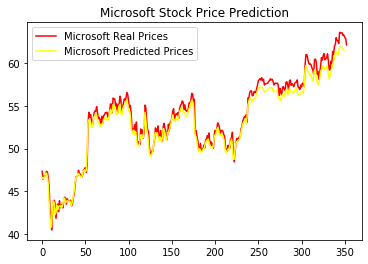

In [82]:
plt.plot(real_prices, color = 'red',label = 'Microsoft Real Prices')
plt.plot(predicted_stock_price, color = 'yellow', label = 'Microsoft Predicted Prices')
plt.title('Microsoft Stock Price Prediction')
plt.legend()
plt.show()

In [53]:
train_acc = recc_model.evaluate(trainX, trainY, verbose=0)
test_acc = recc_model.evaluate(testX, testY, verbose=0)
print(train_acc)
print(test_acc)

[0.000164660342773926, 0.008951782138957238]
[0.0011598336497055633, 0.027659867044006074]


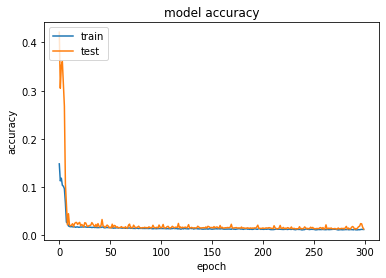

In [54]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

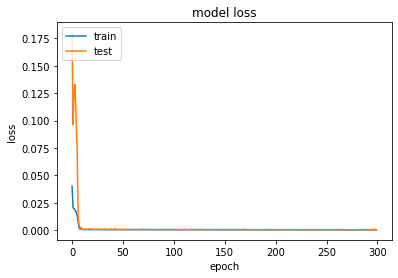

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()